# Captone Project

### Import Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

### Import CSV files

In [2]:
df = pd.read_csv('Data/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


From the following table, we can see there's 918 rows from which each represent a different person. Must of the columns are of integer type, but we'll also be focusing on **HeartDisease** column which can be considered of boolean type.

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Categorical Plot

First off, we'll be creating a simple count plot to show how many different cases of heart disease we have on our dataset

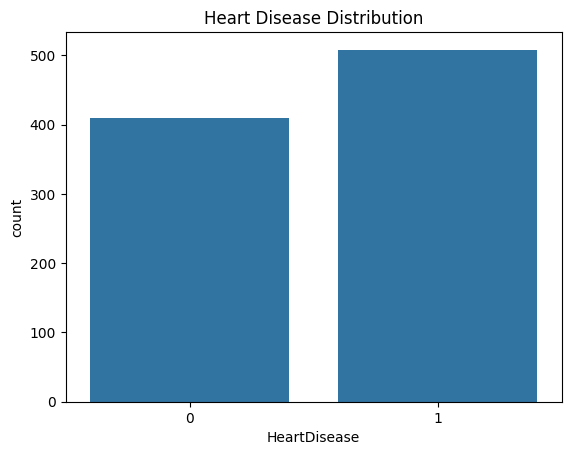

In [4]:
# Create a graphic for people who have and don't have heart diseases
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

Now lets clean a little bit our data for our next plot, which will be showing a bar chart illustrating the difference between men and women with heart disease using their age as X-axis value

In [5]:
fem = []
mas = []
ages = df.Age.unique()
age_heart_disease_df = df[['Age', 'HeartDisease', 'Sex']]
age_heart_disease_df = age_heart_disease_df.groupby(['Age', 'Sex']).sum()
for age in ages:
    for sex in ["F", "M"]:
        if (age, sex) in age_heart_disease_df.index:
            if sex == "F":
                fem.append(age_heart_disease_df.loc[age, sex].HeartDisease)
            else:
                mas.append(age_heart_disease_df.loc[age, sex].HeartDisease)
        else:
            if sex == "F":
                fem.append(0)
            else:
                mas.append(0)

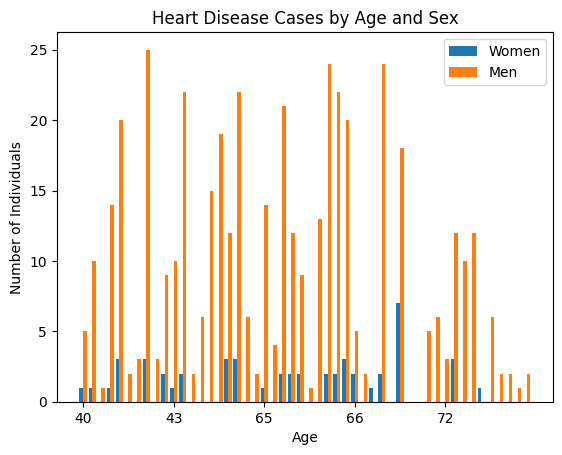

In [6]:
X_axis = np.arange(len(ages))

tick_positions = np.arange(0, len(ages), step=10)
tick_labels = [ages[i] for i in tick_positions]

plt.bar(X_axis - 0.2, fem, 0.4, label='Women')
plt.bar(X_axis + 0.2, mas, 0.4, label='Men')

plt.xticks(tick_positions, tick_labels)
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.title('Heart Disease Cases by Age and Sex')
plt.legend()
plt.show()

### Choresterol and HeartDisease

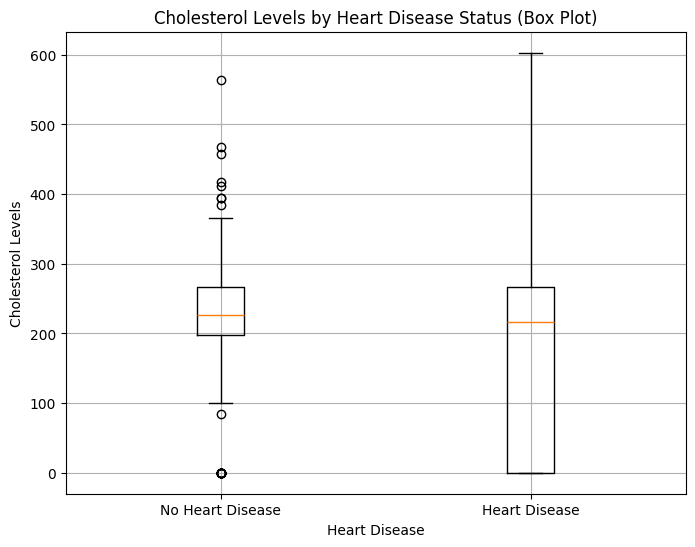

In [7]:
# Create separate Series for cholesterol levels for individuals with and without heart disease
cholesterol_heart_disease = df[df['HeartDisease'] == 1]['Cholesterol']
cholesterol_no_heart_disease = df[df['HeartDisease'] == 0]['Cholesterol']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([cholesterol_no_heart_disease, cholesterol_heart_disease], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels')
plt.title('Cholesterol Levels by Heart Disease Status (Box Plot)')
plt.grid(True)
plt.show()

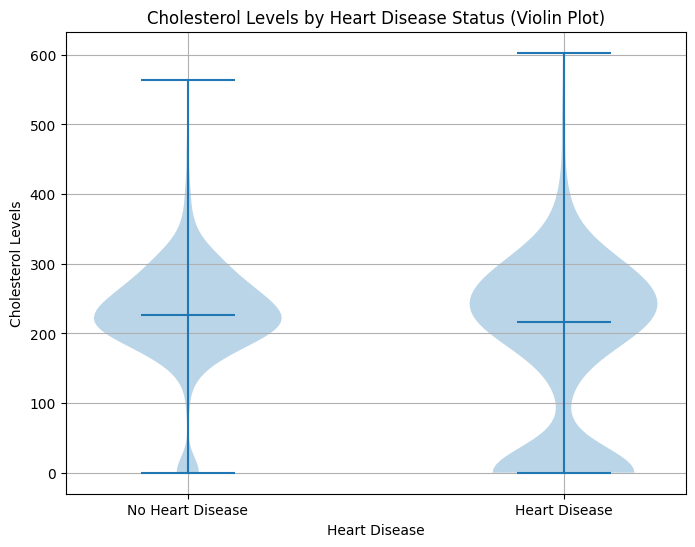

In [8]:
# Or a violin plot for a denser representation
plt.figure(figsize=(8, 6))
plt.violinplot([cholesterol_no_heart_disease, cholesterol_heart_disease], showmedians=True)
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels')
plt.title('Cholesterol Levels by Heart Disease Status (Violin Plot)')
plt.grid(True)
plt.show()

### Dataset Transformation and Cleaning

In [9]:
df["Sex"] = df["Sex"].map(lambda  x : 1 if x == "M" else 0)
df["ExerciseAngina"] = df["ExerciseAngina"].map(lambda  x : 1 if x == "Y" else 0)

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [11]:
enriched_df = df.drop(["ST_Slope"], axis = 1).join(pd.get_dummies(df.ST_Slope, dtype=float))
enriched_df = enriched_df.drop(["RestingECG"], axis = 1).join(pd.get_dummies(enriched_df.RestingECG, dtype=float))
enriched_df = enriched_df.drop(["ChestPainType"], axis = 1).join(pd.get_dummies(enriched_df.ChestPainType, dtype=float))

In [12]:
enriched_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Down,Flat,Up,LVH,Normal,ST,ASY,ATA,NAP,TA
0,40,1,140,289,0,172,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49,0,160,180,0,156,0,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,48,0,138,214,0,108,1,1.5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,54,1,150,195,0,122,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
enriched_df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Down,Flat,Up,LVH,Normal,ST,ASY,ATA,NAP,TA
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377,0.068627,0.501089,0.430283,0.204793,0.601307,0.193900,0.540305,0.188453,0.221133,0.050109
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414,0.252957,0.500271,0.495386,0.403770,0.489896,0.395567,0.498645,0.391287,0.415236,0.218289
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Statistics

In [14]:
for col in enriched_df.columns:
    print(col, np.corrcoef(enriched_df.HeartDisease, enriched_df[col])[0][1])

Age 0.2820385058189974
Sex 0.3054449159631404
RestingBP 0.10758898037140403
Cholesterol -0.2327406389270117
FastingBS 0.26729118611029834
MaxHR -0.4004207694631903
ExerciseAngina 0.4942819918242686
Oldpeak 0.40395072206288646
HeartDisease 1.0
Down 0.1225266764064919
Flat 0.5541335908840072
Up -0.622164208395995
LVH 0.010670195926114637
Normal -0.09157996051345976
ST 0.10252722218986657
ASY 0.5167164574900891
ATA -0.40192405291466793
NAP -0.2129636250394063
TA -0.05479026202691404


### Model

In [15]:
y = enriched_df.HeartDisease
X = enriched_df.drop("HeartDisease", axis=1)

In [16]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     81.59
Date:                Thu, 09 May 2024   Prob (F-statistic):          3.35e-156
Time:                        13:06:56   Log-Likelihood:                -267.50
No. Observations:                 918   AIC:                             567.0
Df Residuals:                     902   BIC:                             644.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1446      0.073      1.